<a href="https://colab.research.google.com/github/AkramDataEngineering/ML_House-Rent-Prediction/blob/main/House_Rent_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# HOUSE RENT PREDICTION TRADITIONAL MODEL

In [ ]:
   ############################# HOUSE RENT PREDICTION MODEL : Model Type LSTM /Sequential named predictor  ##############

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
house = pd.read_csv("House_Rent_Dataset.csv")
house.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
#Before moving forward, let’s check if the data contains null values or not:
house.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [ ]:
#Let’s have a look at the descriptive statistics of the data:
house.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [ ]:
#Now let’s have a look at the mean, median, highest, and lowest rent of the houses:
print(f"The Average Rent in the Dataset: {house.Rent.mean()}") # Or you can do like this : house["Rent"].mean()
print(f"The Median Rent in the Dataset: {house.Rent.median()}") # Or you can do like this : house["Rent"].median()
print(f"The Highest Rent in the Dataset: {house.Rent.min()}") # Or you can do like this : house["Rent"].min()
print(f"The Lowest Rent in the Dataset: {house.Rent.max()}") # Or you can do like this : house["Rent"].max()

The Average Rent in the Dataset: 34993.45132743363
The Median Rent in the Dataset: 16000.0
The Highest Rent in the Dataset: 1200
The Lowest Rent in the Dataset: 3500000


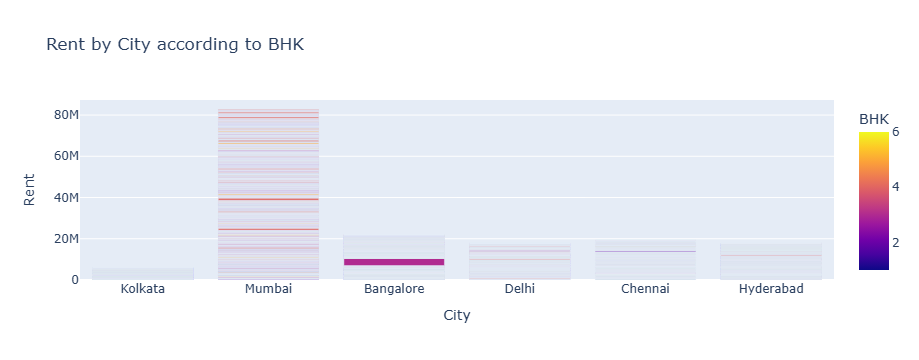

In [ ]:
#Now let’s have a look at the rent of the houses in different cities according to the number of bedrooms,
#halls, and kitchens:

figure1 = px.bar(house,x = house["City"],y=house["Rent"],color = house["BHK"],title="Rent by City according to BHK")
figure1.show()

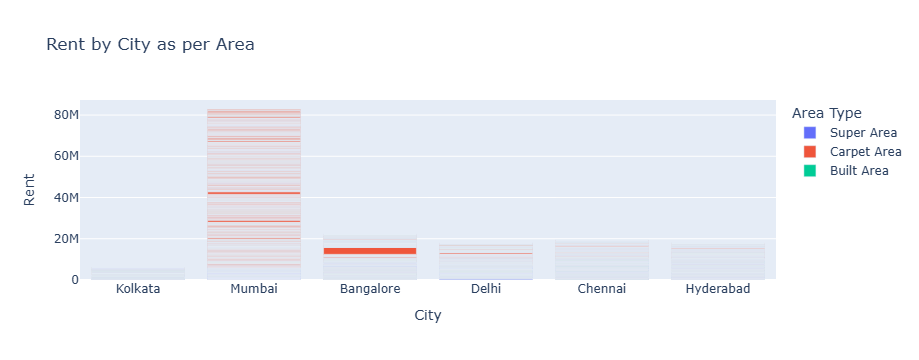

In [ ]:
#Now let’s have a look at the rent of the houses in different cities according to the area type:
figure2 = px.bar(house,x=house["City"],y = house["Rent"],color = house["Area Type"],title="Rent by City as per Area")
figure2.show()

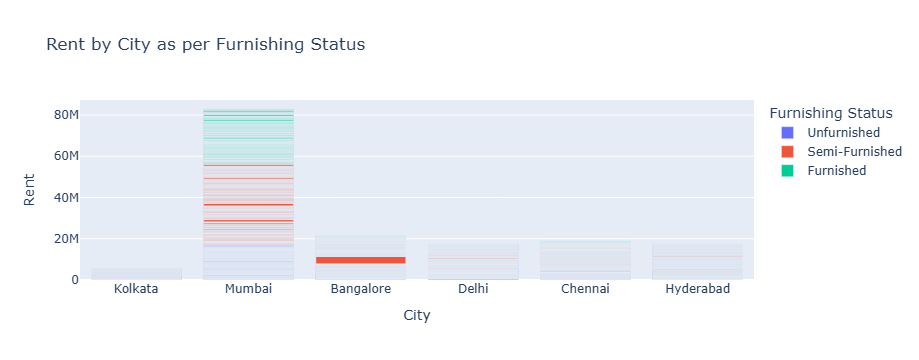

In [ ]:
#Now let’s have a look at the rent of the houses in different cities according to the furnishing status of the house:
figure3 = px.bar(house,x = house["City"],y = house["Rent"],color =house["Furnishing Status"],title ="Rent by City as per Furnishing Status")
figure3.show()

In [ ]:
house.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

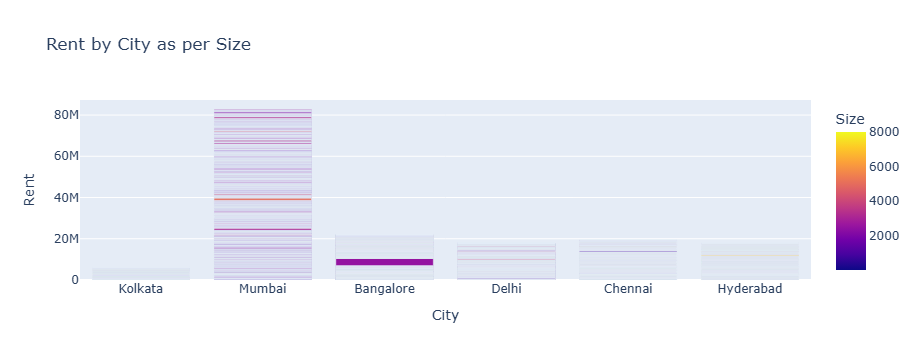

In [ ]:
#Now let’s have a look at the rent of the houses in different cities according to the size of the house:
figure4 = px.bar(house, x = house["City"],y = house["Rent"],color = house["Size"],title = "Rent by City as per Size")
figure4.show()

In [ ]:
#Now let’s have a look at the number of houses available for rent in different cities according to the dataset:
cities = house["City"].value_counts()
label= cities.index
counts = cities.values
colors = ["gold","lightgreen"]

figure5 = go.Figure(data = [go.Pie(labels=label,values=counts,hole= 0.5)])
figure5.update_layout(title_text ="Number of Houses Available for Rent")
figure5.update_traces(hoverinfo ="label+percent",textinfo = "value",textfont_size =30,
                      marker = dict(colors = colors,line= dict(color = "black",width=3)))
figure5.show()

In [ ]:
house.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

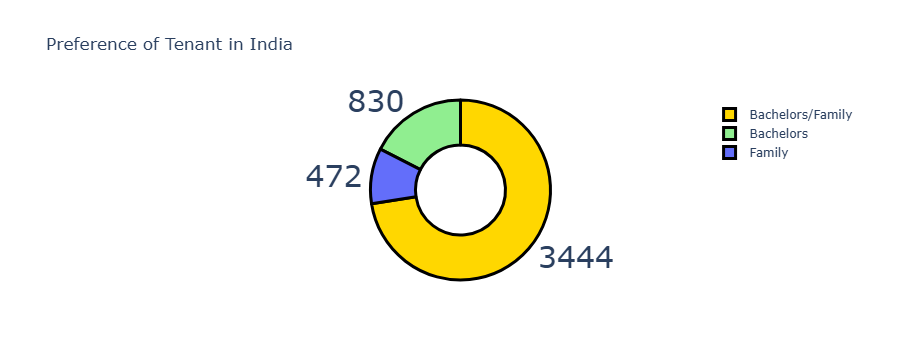

In [ ]:
# Preference of Tenant
tenant = house["Tenant Preferred"].value_counts()
label = tenant.index
counts = tenant.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts, hole=0.5)])
fig.update_layout(title_text='Preference of Tenant in India')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [ ]:
#####                                   House Rent Prediction Model

#Now I will convert all the categorical features into numerical features that we need to train a house rent prediction model:

In [ ]:
house.columns
house["Tenant Preferred"].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [ ]:
house["Area Type"] = house["Area Type"].map({"Super Area":1,"Carpet Area":2,"Built Area":3}) #Dont Run it Twice

In [ ]:
house["City"] = house["City"].map({"Mumbai":400000,"Kolkata":700000,"Bangalore":560000,"Delhi" :110000
                                   ,"Chennai":600001,"Hyderabad":500001}) #Dont Run it Twice

In [ ]:
house["Furnishing Status"] = house["Furnishing Status"].map({"Unfurnished":0,"Semi-Furnished":1 ,"Furnished":2}) #Dont Run it Twice

In [ ]:
house["Tenant Preferred"] = house["Tenant Preferred"].map({"Bachelors/Family":2,"Bachelors":1,"Family":3}) #Dont Run it Twice

In [ ]:
house.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,1,Bandel,700000,0,2,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,1,"Phool Bagan, Kankurgachi",700000,1,2,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,1,Salt Lake City Sector 2,700000,1,2,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,1,Dumdum Park,700000,0,2,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,2,South Dum Dum,700000,0,1,1,Contact Owner


In [ ]:
###! Now I will split the data into training and test sets:

In [ ]:
# pip install keras
!pip install tensorflow

In [ ]:
#splitting Data
from sklearn.model_selection import train_test_split
x= np.array(house[["BHK","Size","Area Type","City","Furnishing Status","Tenant Preferred","Bathroom"]]) #Variable
y= np.array(house["Rent"])

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=42)

In [ ]:
#Now let’s train a house rent prediction model using an LSTM (Long Short Term Memory)neural network model:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
predictor = Sequential()
predictor.add(LSTM(128,return_sequences = True,input_shape = (xtrain.shape[1],1)))
predictor.add(LSTM(64,return_sequences=False))
predictor.add(Dense(25))
predictor.add(Dense(1))
predictor.summary()

C:\Users\ah79168\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
predictor.compile(optimizer="adam",loss="mean_squared_error")
predictor.fit(xtrain,ytrain,batch_size =1,epochs=21)

Epoch 1/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - loss: 4955175424.0000
Epoch 2/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 5753283584.0000
Epoch 3/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 6346295296.0000
Epoch 4/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 8615520256.0000
Epoch 5/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 3309538048.0000
Epoch 6/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 4846901248.0000
Epoch 7/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 3176235520.0000
Epoch 8/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 6870848512.0000
Epoch 9/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 6417454080.0000
Epoch 10/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 6962499072.0000
Epoch 11/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 8115244544.0000
Epoch 12/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 4281222912.0000
Epoch 13/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 23s 5m

In [ ]:
#Now here’s how to predict the rent of a housing property using the trained model:

In [ ]:
print("Enter House Detail to Predict Rent")
a= int(input("Number of BHK: "))
b= int(input("Size of the House: "))
c = int(input("Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): "))
d = int(input("Pin Code of the City: "))
e = int(input("Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): "))
f = int(input("Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): "))
g = int(input("Number of bathrooms: "))

user_inputs = np.array([[a,b,c,d,e,f,g]])
print("Predicted House Price = ",predictor.predict(user_inputs))

Enter House Detail to Predict Rent


Number of BHK:  2
Size of the House:  1000
Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3):  2
Pin Code of the City:  110000
Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2):  1
Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3):  3
Number of bathrooms:  2


In [ ]:
user_inputs = np.array([[a,b,c,d,e,f,g]])
print("Predicted House Price = ",predictor.predict(user_inputs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
Predicted House Price =  [[37160.78]]


In [ ]:
##                         Summary
#So this is how to use Machine Learning to predict the rent of a housing property.
#With appropriate data and Machine Learning techniques, many real estate platforms find the housing options according to the customer’s budget.